Kod napisali, projekt wykonali:
Michał Kamieniak, Jakub Mańczak.

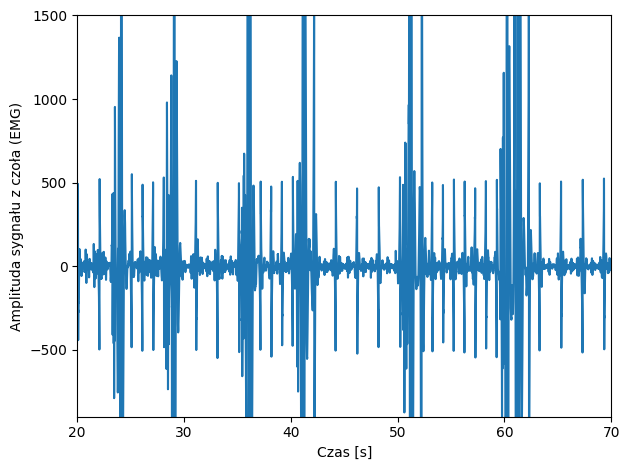

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import aseegg as ag

df = pd.read_csv("proba1/ganglion_4ch_2025-12-05_10-42-22.csv")
t_axis = np.linspace(0, len(df['ch1'])/200, len(df['ch1']))
f_axis = np.linspace(0, 200, len(df['ch1']))
przef = ag.gornoprzepustowy(df['ch1'], 200, 1)
przef = ag.pasmowozaporowy(przef, 200, 48, 52)
przef = ag.pasmowoprzepustowy(przef, 200, 3, 40)

t_axis = np.linspace(0,len(przef)/200,len(przef))
plt.plot(t_axis, przef)
plt.xlim([20, 70])
plt.ylim([-900, 1500])
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda sygnału z czoła (EMG)")
plt.tight_layout()
plt.savefig("proba1.svg")

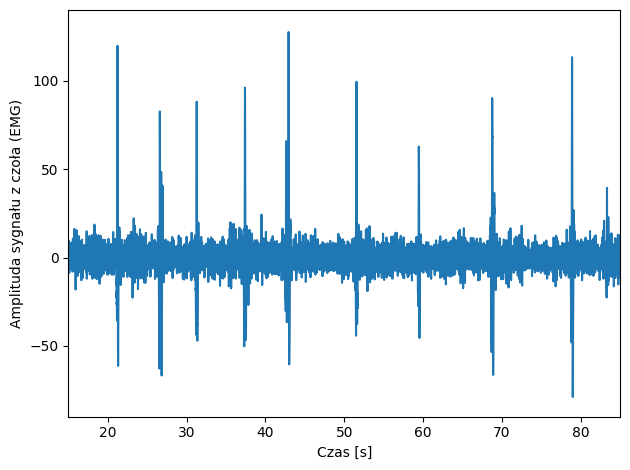

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import aseegg as ag

df = pd.read_csv("proba2/ganglion_4ch_2025-12-05_10-58-15.csv")
t_axis = np.linspace(0, len(df['ch1'])/200, len(df['ch1']))
f_axis = np.linspace(0, 200, len(df['ch1']))
przef = ag.gornoprzepustowy(df['ch1'], 200, 1)
przef = ag.pasmowozaporowy(przef, 200, 48, 52)
przef = ag.pasmowoprzepustowy(przef, 200, 3, 40)

t_axis = np.linspace(0,len(przef)/200,len(przef))
plt.plot(t_axis, przef)
plt.xlim([15, 85])
plt.ylim([-90, 140])
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda sygnału z czoła (EMG)")
plt.tight_layout()
plt.savefig("proba2.svg")

In [ ]:
# SKRYPT DEKODUJĄCO-PORÓWNAWCZY WERSJA 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import aseegg as ag

df = pd.read_csv("proba2/ganglion_4ch_2025-12-05_10-58-15.csv")
przef = ag.gornoprzepustowy(df['ch1'], 200, 1)
przef = ag.pasmowozaporowy(przef, 200, 48, 52)
przef = ag.pasmowoprzepustowy(przef, 200, 3, 40)

mrugniecia = []
flaga = False
granica = 50
for indeks, wartosc in enumerate(przef):
    if wartosc > 50 and flaga == False:
        flaga = True
        mrugniecia.append(df['time'][indeks])
    if wartosc < 50:
        flaga = False

literki = pd.read_csv("proba2/letter_log.txt", names=['litera', 'czas_start', 'czas_stop'], sep="\t")

for mrug in mrugniecia:
    for kol, rzad in literki.iterrows():
        if mrug > rzad['czas_start'] and mrug < rzad['czas_stop']:
            # print(rzad['litera'])
            start = df['time'][0]
            print(f'{rzad['litera']} @ {mrug-start}')

F @ 26.58999991416931
N @ 42.625
N @ 42.920000076293945
A @ 68.75
F @ 78.89499998092651


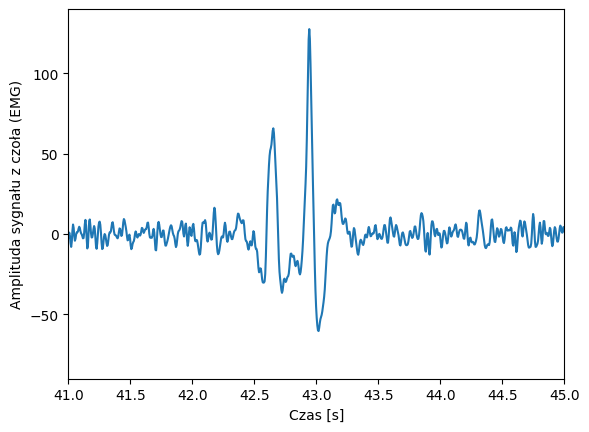

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import aseegg as ag

df = pd.read_csv("proba2/ganglion_4ch_2025-12-05_10-58-15.csv")
t_axis = np.linspace(0, len(df['ch1'])/200, len(df['ch1']))
f_axis = np.linspace(0, 200, len(df['ch1']))
przef = ag.gornoprzepustowy(df['ch1'], 200, 1)
przef = ag.pasmowozaporowy(przef, 200, 48, 52)
przef = ag.pasmowoprzepustowy(przef, 200, 3, 40)

t_axis = np.linspace(0,len(przef)/200,len(przef))
plt.plot(t_axis, przef)
plt.xlim([41, 45])
plt.ylim([-90, 140])
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda sygnału z czoła (EMG)")
plt.savefig("blad.svg")

In [102]:
# SKRYPT DEKODUJĄCO-PORÓWNAWCZY WERSJA 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import aseegg as ag

df = pd.read_csv("proba2/ganglion_4ch_2025-12-05_10-58-15.csv")
przef = ag.gornoprzepustowy(df['ch1'], 200, 1)
przef = ag.pasmowozaporowy(przef, 200, 48, 52)
przef = ag.pasmowoprzepustowy(przef, 200, 3, 40)

mrugniecia = []
flaga = False
granica = 50
odstep = 0.3
for indeks, wartosc in enumerate(przef):
    if wartosc > 50 and flaga == False:
        flaga = True
        if len(mrugniecia) != 0:
            if df['time'][indeks] - mrugniecia[-1] >= odstep:
                mrugniecia.append(df['time'][indeks])
        else:
            mrugniecia.append(df['time'][indeks])
    if wartosc < 50:
        flaga = False

literki = pd.read_csv("proba2/letter_log.txt", names=['litera', 'czas_start', 'czas_stop'], sep="\t")

for mrug in mrugniecia:
    for kol, rzad in literki.iterrows():
        if mrug > rzad['czas_start'] and mrug < rzad['czas_stop']:
            print(rzad['litera'])

F
N
A
F


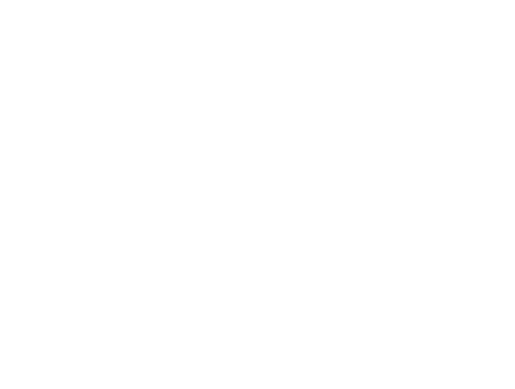

In [11]:
# eksport pliku .svg do strony tytułowej
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import aseegg as ag

df = pd.read_csv("proba2/ganglion_4ch_2025-12-05_10-58-15.csv")
przef = ag.gornoprzepustowy(df['ch1'], 200, 1)
przef = ag.pasmowozaporowy(przef, 200, 48, 52)
przef = ag.pasmowoprzepustowy(przef, 200, 3, 40)
t_axis = np.linspace(0,len(przef)/200,len(przef))

plt.plot(t_axis, przef, color='white', linewidth=.5)
plt.xlim([20, 25])
plt.ylim([-90, 140])
plt.axis('off')
plt.savefig(
    "fala-tytulowa.svg",
    transparent=True,
    pad_inches=0,
    bbox_inches='tight'
)